In [1]:
import matplotlib.pylab as plt
import pandas as pd
import torch.nn as nn
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from scipy import stats
import torch.nn.functional as F
import torch
torch.set_default_tensor_type('torch.FloatTensor')
import torch.autograd as autograd
from torch import optim
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader
from IPython import display

In [2]:
dataset = pd.read_csv(filepath_or_buffer='spambase/spambase.data', header = None)
inputs_indx = [x for x in range(57)]
label_indx = 57
print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))

4601
4601


scaler = preprocessing.StandardScaler()
dataset.loc[:, inputs_indx] = scaler.fit_transform(dataset.loc[:, inputs_indx])
print(len(scaler.mean_))
dataset[0]

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i], bins = 15)
    plt.title(i+1)
plt.savefig('hist1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i + 25], bins = 15)
    plt.title(i + 26)
plt.savefig('hist2.png', bbox_inches='tight')

plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.hist(dataset[i + 50], bins = 15)
    plt.title(i + 51)
plt.savefig('hist3.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i], vert=False)
    plt.title(i+1)
plt.savefig('box1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('box2.png', bbox_inches='tight')

plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('box3.png', bbox_inches='tight')

outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset[dataset[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset[dataset[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('outlier_goodbad.png', bbox_inches='tight')

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset[dataset[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset[dataset[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('hist_gengoodspam.png', bbox_inches='tight')

corr_of_dataset = np.array(dataset.corr())

plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr.png', bbox_inches='tight')

spearman_of_dataset = np.array(dataset.corr(method='spearman'))
plt.figure(figsize=(18,11))
mask = np.zeros_like(spearman_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(spearman_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_spearman.png', bbox_inches='tight')

kendal_of_dataset = np.array(dataset.corr(method='kendall'))
plt.figure(figsize=(18,11))
mask = np.zeros_like(kendal_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(kendal_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_kendal.png', bbox_inches='tight')

atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset[atr_to_scatter[i][0]], dataset[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('scatter_diag.png', bbox_inches='tight')

In [3]:
clf = svm.OneClassSVM(kernel="rbf")
clf.fit(dataset[inputs_indx])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [4]:
OUTLIER_FRACTION = 0.05
dist_to_border = clf.decision_function(dataset[inputs_indx]).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

(array([177.,  12.,   6.,   5.,   6.,   4.,   1.,   5.,   3.,   1.,   3.,
          4.,   1.,   2.,   1.]),
 array([-6.3928493 , -6.39156876, -6.39028822, -6.38900768, -6.38772714,
        -6.3864466 , -6.38516607, -6.38388553, -6.38260499, -6.38132445,
        -6.38004391, -6.37876337, -6.37748283, -6.37620229, -6.37492175,
        -6.37364121]),
 <a list of 15 Patch objects>)

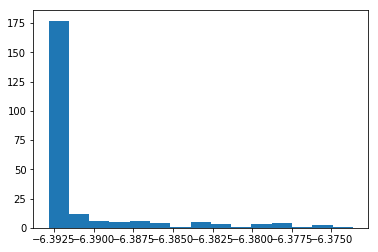

In [5]:
plt.hist(dist_to_border[is_inlier == False], bins = 15)

In [6]:
dataset_outlier = dataset[is_inlier == False]
dataset_clear = dataset[is_inlier == True]
print(len(dataset)*0.05)
print(len(dataset)*0.95)
print(len(dataset_outlier))
print(len(dataset_clear))
dataset_clear.head()

230.05
4370.95
231
4370


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.00,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15,54,1


outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_clear[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_clear[dataset_clear[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_clear[dataset_clear[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('after_svm_outlier_goodbad.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_clear[i], vert=False)
    plt.title(i+1)
plt.savefig('box1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_clear[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('box2.png', bbox_inches='tight')

plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset_clear[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('box3.png', bbox_inches='tight')

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_clear[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_clear[dataset_clear[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_clear[dataset_clear[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('after_svm_hist_gengoodspam.png', bbox_inches='tight')

In [7]:
dataset_clear.loc[:, inputs_indx] = preprocessing.minmax_scale(dataset_clear.loc[:, inputs_indx], feature_range=(0.1, 0.9))
dataset_clear.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.100000,0.135854,0.200392,0.1,0.1256,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.1,0.100000,0.1,0.165003,0.100000,0.100000,0.103311,0.136036,0.124381,1
1,0.137004,0.115686,0.178431,0.1,0.1112,0.138095,0.123109,0.105041,0.100000,0.167687,...,0.1,0.120011,0.1,0.131081,0.123988,0.102925,0.104942,0.160060,0.190395,1
3,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120769,0.1,0.111446,0.100000,0.100000,0.103047,0.123423,0.116724,1
4,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120466,0.1,0.111279,0.100000,0.100000,0.103047,0.123423,0.116724,1
5,0.100000,0.100000,0.100000,0.1,0.2480,0.100000,0.100000,0.233213,0.100000,0.100000,...,0.1,0.133807,0.1,0.100000,0.100000,0.100000,0.102402,0.108408,0.104665,1


In [8]:
dataset_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4600
Data columns (total 58 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_clear[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_clear[dataset_clear[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_clear[dataset_clear[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('scale_hist_gengoodspam.png', bbox_inches='tight')

outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_clear[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_clear[dataset_clear[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_clear[dataset_clear[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('scale_outlier_goodbad.png', bbox_inches='tight')

atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset_clear[atr_to_scatter[i][0]], dataset_clear[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('scale_scatter_diag.png', bbox_inches='tight')

corr_of_dataset_clear = np.array(dataset_clear.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset_clear)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset_clear, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr_clear.png', bbox_inches='tight')

In [9]:
end_dataset = PCA(n_components=50).fit_transform(dataset_clear[inputs_indx])
end_dataset = pd.DataFrame(end_dataset)

corr_features = features.corr()
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_features)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_features, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr_features.png', bbox_inches='tight')

In [10]:
end_dataset[50] = np.array(dataset_clear[57])
end_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 51 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(features[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((features[labels == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((features[labels == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('end_outlier_goodbad.png', bbox_inches='tight')

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(features[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((features[labels == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((features[labels == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('end_scale_hist_gengoodspam.png', bbox_inches='tight')

atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [44, 45], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 16], [37, 35], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 5, i+1)
    plt.scatter(features[atr_to_scatter[i][0]], features[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('end_scale_scatter_diag.png', bbox_inches='tight')

In [11]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data.iloc[idx]

In [12]:
nonspam_end_dataset = end_dataset[end_dataset[50] == 0]
spam_end_dataset = end_dataset[end_dataset[50] == 1]
nonspam_end_dataset = nonspam_end_dataset.reindex()
spam_end_dataset= spam_end_dataset.reindex()

In [13]:
rand_indxs_spam = np.arange(len(spam_end_dataset))
rand_indxs_nonspam = np.arange(len(nonspam_end_dataset))

np.random.shuffle(rand_indxs_spam)
np.random.shuffle(rand_indxs_nonspam)

f_threshold_spam = int(len(spam_end_dataset)*0.6)
s_threshold_spam = int(len(spam_end_dataset)*0.9)

f_threshold_nonspam = int(len(nonspam_end_dataset)*0.6)
s_threshold_nonspam = int(len(nonspam_end_dataset)*0.9)

learn_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[:f_threshold_spam]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[:f_threshold_nonspam]]])

valid_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[f_threshold_spam:s_threshold_spam]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[f_threshold_nonspam:s_threshold_nonspam]]])

test_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[s_threshold_spam:]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[s_threshold_nonspam:]]])

print(len(learn_dataset), len(valid_dataset), len(test_dataset), len(learn_dataset)+len(valid_dataset)+len(test_dataset), len(end_dataset))

2621 1311 438 4370 4370


In [14]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1235 to 1998
Data columns (total 51 columns):
0     438 non-null float64
1     438 non-null float64
2     438 non-null float64
3     438 non-null float64
4     438 non-null float64
5     438 non-null float64
6     438 non-null float64
7     438 non-null float64
8     438 non-null float64
9     438 non-null float64
10    438 non-null float64
11    438 non-null float64
12    438 non-null float64
13    438 non-null float64
14    438 non-null float64
15    438 non-null float64
16    438 non-null float64
17    438 non-null float64
18    438 non-null float64
19    438 non-null float64
20    438 non-null float64
21    438 non-null float64
22    438 non-null float64
23    438 non-null float64
24    438 non-null float64
25    438 non-null float64
26    438 non-null float64
27    438 non-null float64
28    438 non-null float64
29    438 non-null float64
30    438 non-null float64
31    438 non-null float64
32    438 non-null float64


In [15]:
learn_spam_data = np.array(MyDataset(learn_dataset))
valid_spam_data = np.array(MyDataset(valid_dataset))
test_spam_data = np.array(MyDataset(test_dataset))
learn_dataloader = DataLoader(learn_spam_data, batch_size=1, shuffle=False)
valid_dataloader = DataLoader(valid_spam_data, batch_size=len(valid_spam_data), shuffle=False)
test_dataloader = DataLoader(test_spam_data, batch_size=len(test_spam_data), shuffle=False)

In [16]:
learn_spam_data.shape

(2621, 51)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(50, 20)
        self.lin2 = nn.Linear(20, 10)
        self.lin3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.tanh(self.lin1(x))
        x = F.tanh(self.lin2(x))
        x = F.sigmoid(self.lin3(x))
        return x

net = Net()
net

Net(
  (lin1): Linear(in_features=50, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=1, bias=True)
)

In [18]:
feature_index = np.arange(50)
feature_index
label_indx = 50

In [19]:
def type_weights(layer):
    if (type(layer) == nn.Linear):
        print(layer.weight.requires_grad)
net.apply(type_weights)

True
True
True


Net(
  (lin1): Linear(in_features=50, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=1, bias=True)
)

In [20]:
#Инициализация весов
stds = [(2/(50+20+1))**(1/2), (2/(20+10+1))**(1/2), (32/(10+1+1))**(1/2)]
null_weigth = []
stds.reverse()
def get_weights(layer):
    if (type(layer) == nn.Linear):
        null_weigth.append(torch.randn(layer.weight.data.shape)*stds.pop())
net.apply(get_weights)
null_weigth.reverse()
null_weigth

[tensor([[-1.8242,  0.7004,  0.3072, -1.2434, -1.8036,  2.0332, -0.1901,
          -3.2951,  0.1524, -2.4361]]),
 tensor([[ 0.5215, -0.0398,  0.3532, -0.2106,  0.1947,  0.2994,  0.2864,
          -0.1077, -0.1327, -0.2516,  0.2884, -0.4215,  0.2027, -0.0369,
          -0.0803, -0.2243, -0.0893, -0.2745,  0.4415,  0.1801],
         [ 0.5082,  0.2228,  0.0843,  0.2600,  0.0130, -0.0799, -0.1130,
           0.3192, -0.1232,  0.3718,  0.2303, -0.2321,  0.1181,  0.0353,
           0.1382,  0.2937,  0.0585,  0.2822,  0.1687,  0.5539],
         [ 0.0880, -0.1366,  0.0693, -0.4774,  0.0821,  0.0679,  0.0262,
          -0.0193, -0.1309, -0.1938, -0.1193, -0.3216, -0.0945,  0.3427,
          -0.0447,  0.2029, -0.0128, -0.0209, -0.3895, -0.1942],
         [ 0.0210,  0.0601,  0.0086,  0.2002,  0.2496,  0.2307,  0.0728,
          -0.2124,  0.2637, -0.0874, -0.0889,  0.0087,  0.5178, -0.0557,
          -0.0259,  0.1338,  0.2185, -0.2478, -0.5010,  0.2518],
         [ 0.0882,  0.5987,  0.2015, -0.027

In [21]:
tmp_null_weigth = []
for i in range(len(null_weigth)):
    tmp_null_weigth.append(np.copy(null_weigth[i]))
def init_weigths(layer):
    if(type(layer) == nn.Linear):
        layer.weight.data = torch.from_numpy(tmp_null_weigth.pop())
net.apply(init_weigths)
net.lin1.weight

Parameter containing:
tensor([[ 0.0618, -0.2712,  0.0499,  0.1045,  0.0877,  0.1328, -0.0999,
         -0.0189,  0.0997, -0.1746,  0.1796,  0.1290, -0.0507,  0.0419,
         -0.1641, -0.0300,  0.2213,  0.0647, -0.1162,  0.0628, -0.0511,
          0.0471, -0.3735, -0.2170, -0.1866, -0.2124,  0.1996, -0.1003,
          0.1543, -0.2101,  0.0172,  0.1725, -0.0978,  0.0522,  0.1839,
         -0.0895, -0.0089, -0.2060,  0.1258, -0.1166,  0.1359,  0.0752,
          0.0973, -0.0602, -0.2644, -0.2689,  0.0941, -0.0097, -0.0586,
         -0.0770],
        [ 0.0972, -0.1239,  0.0150, -0.0995, -0.0652,  0.3730, -0.0239,
          0.1005, -0.0452, -0.0260, -0.2350, -0.0311,  0.0290, -0.0684,
          0.0447,  0.2495,  0.3102, -0.1836,  0.1692,  0.1416,  0.1609,
          0.0162,  0.0915,  0.1943, -0.0752, -0.1539,  0.0644,  0.1224,
          0.2695, -0.0283, -0.1122,  0.1587,  0.1334, -0.1256,  0.1076,
         -0.0641,  0.0188, -0.0625, -0.0917,  0.0101, -0.0358, -0.0952,
         -0.0855,  0.02

In [ ]:
criterion = nn.BCELoss(size_average=True)

In [ ]:
lr=0.0001
for mu in [0, 0.75, 0.4, 0.15]:
    tmp_null_weigth = []
    for i in range(len(null_weigth)):
        tmp_null_weigth.append(np.copy(null_weigth[i]))
    net.apply(init_weigths)
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=mu)
    
    learn_epoch_loss = []
    valid_epoch_loss = []
    test_epoch_loss = []
    epoch_list = []
    for epoch in range(550):#10**5:
        loss_acc = 0

        for learn_data in learn_dataloader:
            optimizer.zero_grad()
            features_learn, labels_learn = learn_data[:, feature_index], learn_data[:, label_indx]
            features_learn, labels_learn  = autograd.Variable((features_learn).float()).unsqueeze(1), autograd.Variable(labels_learn.float()).unsqueeze(1)
            outputs_learn = net(features_learn)
            loss_learn = criterion(outputs_learn, labels_learn)
            loss_learn.backward()
            optimizer.step()
            loss_acc += float(loss_learn.data)
        learn_epoch_loss.append(loss_acc/len(learn_dataloader))

        if epoch % 10 == 0:
            epoch_list.append(epoch)
            for valid_data in valid_dataloader:
                features_valid, labels_valid = valid_data[:, feature_index], valid_data[:, label_indx]
                features_valid, labels_valid  = autograd.Variable((features_valid).float()).unsqueeze(1), autograd.Variable(labels_valid.float()).unsqueeze(1)
                outputs_valid = net(features_valid)
                loss_valid = criterion(outputs_valid, labels_valid)
                valid_epoch_loss.append(float(loss_valid.data))

            for test_data in test_dataloader:
                features_test, labels_test = test_data[:, feature_index], test_data[:, label_indx]
                features_test, labels_test  = autograd.Variable((features_test).float()).unsqueeze(1), autograd.Variable(labels_test.float()).unsqueeze(1)
                outputs_test = net(features_test)
                loss_test = criterion(outputs_test, labels_test)
                test_epoch_loss.append(float(loss_test.data))

    plt.clf()
    plt.grid(True)
    plt.plot(learn_epoch_loss, color='r') 
    plt.plot(epoch_list, valid_epoch_loss, color='b') 
    plt.plot(epoch_list,  test_epoch_loss, color='g')
    plt.title('mu = '+str(mu))
    plt.savefig('gd_moment '+str(mu)+' learn: '+str(learn_epoch_loss[len(learn_epoch_loss)-1])+' test '+str(test_epoch_loss[len(test_epoch_loss)-1])+'.png')
            #display.clear_output(wait=True) 
            #display.display(plt.gcf()) 

            #print(epoch, end=" ")
            

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([1311, 1])) that is different to the input size (torch.Size([1311, 1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([438, 1])) that is different to the input size (torch.Size([438, 1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
